## Import Libraries

In [1]:
import model_utils as mu
import pickle
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

## Unigrams

### Create Document-Term Matrices

In [2]:
msft_earnings_dict_cleaned = pickle.load(open('cleaned_corpus.pickle', 'rb'))

In [3]:
msft_earnings_dict_ordered = {}

for tscript in sorted(msft_earnings_dict_cleaned):
    msft_earnings_dict_ordered[tscript] = msft_earnings_dict_cleaned[tscript]

In [4]:
ballmer_dict = dict(list(msft_earnings_dict_ordered.items())[:len(msft_earnings_dict_ordered)//2]) 
nadella_dict = dict(list(msft_earnings_dict_ordered.items())[len(msft_earnings_dict_ordered)//2:]) 

In [5]:
corpus_msft = list(msft_earnings_dict_ordered.values())
corpus_ballmer = list(ballmer_dict.values())
corpus_nadella = list(nadella_dict.values())

In [6]:
import pickle

with open('cleaned_corpus_msft.pickle', 'wb') as f_msft:
    pickle.dump(corpus_msft, f_msft)

with open('cleaned_corpus_ball.pickle', 'wb') as f_ball:
    pickle.dump(corpus_ballmer, f_ball)

with open('cleaned_corpus_nad.pickle', 'wb') as f_nad:
    pickle.dump(corpus_nadella, f_nad)

#### Count vectorizer

In [7]:
cv_msft = mu.document_term_matrix(corpus_msft, CountVectorizer)[0]
cv_ballmer = mu.document_term_matrix(corpus_ballmer, CountVectorizer)[0]
cv_nadella = mu.document_term_matrix(corpus_nadella, CountVectorizer)[0]

X_msft = mu.document_term_matrix(corpus_msft, CountVectorizer)[1]
X_ballmer = mu.document_term_matrix(corpus_ballmer, CountVectorizer)[1]
X_nadella = mu.document_term_matrix(corpus_nadella, CountVectorizer)[1]

In [8]:
word_freq_msft = mu.word_frequency(cv_msft, X_msft)
word_freq_ballmer = mu.word_frequency(cv_ballmer, X_ballmer)
word_freq_nadella = mu.word_frequency(cv_ballmer, X_ballmer)

#### Tf-idf vectorizer

In [9]:
cv_tfidf_msft = mu.document_term_matrix(corpus_msft, TfidfVectorizer)[0]
cv_tfidf_ballmer = mu.document_term_matrix(corpus_ballmer, TfidfVectorizer)[0]
cv_tfidf_nadella = mu.document_term_matrix(corpus_nadella, TfidfVectorizer)[0]

X_tfidf_msft = mu.document_term_matrix(corpus_msft, TfidfVectorizer)[1]
X_tfidf_ballmer = mu.document_term_matrix(corpus_ballmer, TfidfVectorizer)[1]
X_tfidf_nadella = mu.document_term_matrix(corpus_nadella, TfidfVectorizer)[1]

### Topic Modeling

#### Non-negative matrix factorization (NMF), Count vectorizer

In [10]:
X_msft.shape

(56, 3220)

In [11]:
X_ballmer.shape

(28, 1798)

In [12]:
X_nadella.shape

(28, 2246)

In [13]:
top_topic_words_nmf_msft = mu.topic_model(cv_msft, X_msft, NMF, 6, 6)[0]
top_topic_words_nmf_ballmer = mu.topic_model(cv_ballmer, X_ballmer, NMF, 6, 6)[0]
top_topic_words_nmf_nadella = mu.topic_model(cv_nadella, X_nadella, NMF, 6, 6)[0]

top_topic_words_nmf_msft

[['linkedin', 'ai', 'edge', 'iot', 'amortization', 'transformation'],
 ['vista', 'forecast', 'aquantive', 'happy', 'legal', 'yahoo'],
 ['analytics',
  'mobility',
  'restructuring',
  'transformation',
  'cortana',
  'paas'],
 ['github', 'ai', 'remote', 'linkedin', 'edge', 'layer'],
 ['economy', 'condition', 'weak', 'shipment', 'average', 'weakness'],
 ['skype', 'kinect', 'yahoo', 'tablet', 'refresh', 'nokia']]

In [14]:
topic_clustering_nmf_msft = mu.topic_model(cv_msft, X_msft, NMF, 6, 6)[1].argmax(axis=1)
topic_clustering_nmf_ballmer = mu.topic_model(cv_ballmer, X_ballmer, NMF, 6, 6)[1].argmax(axis=1)
topic_clustering_nmf_nadella = mu.topic_model(cv_nadella, X_nadella, NMF, 6, 6)[1].argmax(axis=1)

topic_clustering_nmf_msft

/Users/mike/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


array([1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

#### Latent Dirichlet Allocation (LDA) - Count vectorizer

In [15]:
top_topic_words_lda_msft = mu.topic_model(cv_msft, X_msft, LatentDirichletAllocation, 6, 6)[0]
top_topic_words_lda_ballmer = mu.topic_model(cv_ballmer, X_ballmer, LatentDirichletAllocation, 6, 6)[0]
top_topic_words_lda_nadella = mu.topic_model(cv_nadella, X_nadella, LatentDirichletAllocation, 6, 6)[0]

top_topic_words_lda_msft

[['analytics',
  'mobility',
  'restructuring',
  'transformation',
  'cortana',
  'refresh'],
 ['linkedin', 'amortization', 'ai', 'transformation', 'saas', 'iot'],
 ['linkedin', 'ai', 'edge', 'iot', 'trust', 'variability'],
 ['linkedin', 'ai', 'github', 'edge', 'worker', 'stack'],
 ['skype', 'kinect', 'tablet', 'refresh', 'ed', 'cowen'],
 ['vista', 'forecast', 'yahoo', 'shipment', 'economy', 'happy']]

In [16]:
topic_clustering_lda_msft = mu.topic_model(cv_msft, X_msft, LatentDirichletAllocation, 6, 6)[1].argmax(axis=1)
topic_clustering_lda_ballmer = mu.topic_model(cv_ballmer, X_ballmer, LatentDirichletAllocation, 6, 6)[1].argmax(axis=1)
topic_clustering_lda_nadella = mu.topic_model(cv_nadella, X_nadella, LatentDirichletAllocation, 6, 6)[1].argmax(axis=1)

topic_clustering_lda_msft

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 3, 3, 3,
       3, 4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 1, 4, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### Non-negative matrix factorization (NMF), Tf-idf vectorizer

In [17]:
top_topic_words_nmf_tfidf_msft = mu.topic_model(cv_tfidf_msft, X_tfidf_msft, NMF, 6, 6)[0]
top_topic_words_nmf_tfidf_ballmer = mu.topic_model(cv_tfidf_ballmer, X_tfidf_ballmer, NMF, 6, 6)[0]
top_topic_words_nmf_tfidf_nadella = mu.topic_model(cv_tfidf_nadella, X_tfidf_nadella, NMF, 6, 6)[0]

top_topic_words_nmf_tfidf_msft

[['linkedin', 'ai', 'edge', 'iot', 'amortization', 'transformation'],
 ['skype', 'kinect', 'roadmap', 'tablet', 'private', 'nokia'],
 ['vista', 'aquantive', 'forecast', 'yahoo', 'happy', 'legal'],
 ['restructuring', 'analytics', 'mobility', 'lumia', 'cortana', 'em'],
 ['shipment', 'economy', 'reset', 'nonannuity', 'katherine', 'condition'],
 ['github', 'ai', 'linkedin', 'remote', 'worker', 'layer']]

In [18]:
topic_clustering_nmf_tfidf_msft = mu.topic_model(cv_tfidf_msft, X_tfidf_msft, NMF, 6, 6)[1].argmax(axis=1)
topic_clustering_nmf_tfidf_ballmer = mu.topic_model(cv_tfidf_ballmer, X_tfidf_ballmer, NMF, 6, 6)[1].argmax(axis=1)
topic_clustering_nmf_tfidf_nadella = mu.topic_model(cv_tfidf_nadella, X_tfidf_nadella, NMF, 6, 6)[1].argmax(axis=1)

topic_clustering_nmf_tfidf_msft

/Users/mike/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


array([2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

### Clustering

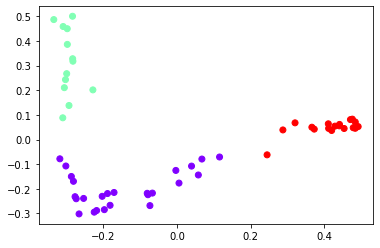

In [19]:
mu.kmeans_clustering(X_tfidf_msft, 3)

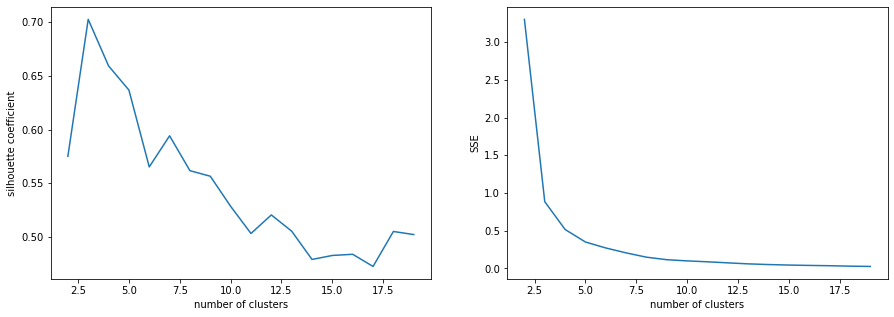

In [20]:
mu.silhouette_coeff_sse(X_tfidf_msft)